## 이미지 식별 머신을 위한 데이터를 준비한다.
### 필요한 라이브러리를 준비한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torch import nn, optim
from PIL import Image
from torchvision import datasets, transforms, models

%matplotlib inline
%config InineBackend.figure_format = 'retina'

## 데이터디렉토리, 분할 비율 , 변환 방법을 설정한다

In [24]:
data_dir = './data'
valid_size = 0.2

t_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.Resize(224),
    transforms.ToTensor()
])

In [25]:
print(t_transforms)

Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
)


In [26]:
#datasetx.imagefoledr 사용 학습데이터와 테스트 데이터생성
train_data = datasets.ImageFolder(data_dir, transform=t_transforms)
test_data = datasets.ImageFolder(data_dir,transform=t_transforms)

print(len(train_data),len(test_data))

155 155


In [27]:
# train_data 만큼의 인덱스 리스트 생성
num_train = len(train_data)
indices = list(range(num_train))
print(indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]


In [28]:
#섞기
np.random.shuffle(indices)
print(indices)

[81, 142, 31, 29, 118, 60, 93, 147, 153, 68, 42, 138, 78, 75, 15, 19, 30, 90, 117, 137, 18, 12, 9, 24, 69, 131, 95, 45, 86, 84, 126, 96, 122, 82, 109, 65, 51, 26, 133, 76, 56, 36, 124, 22, 55, 85, 11, 141, 66, 119, 27, 79, 144, 41, 4, 32, 134, 143, 67, 16, 123, 10, 113, 146, 101, 0, 110, 64, 44, 97, 28, 40, 104, 25, 23, 108, 39, 151, 98, 150, 136, 47, 111, 61, 73, 33, 148, 125, 62, 105, 94, 53, 5, 127, 114, 49, 35, 80, 77, 34, 46, 7, 43, 70, 112, 91, 83, 139, 140, 89, 8, 13, 59, 132, 3, 17, 38, 72, 135, 6, 128, 100, 2, 120, 63, 115, 54, 107, 50, 152, 58, 48, 88, 21, 57, 149, 129, 37, 145, 1, 52, 130, 103, 99, 116, 87, 74, 121, 154, 20, 71, 106, 14, 92, 102]


In [29]:
#분할 비율로 
split = int(np.floor(num_train * valid_size))
print(split)

31


In [30]:
#학습 데이터 인덱스 리스트 테스트인덱스 리스트만만들기
train_idx,test_idx = indices[split:], indices[:split]
print(train_idx)
print(test_idx)

[96, 122, 82, 109, 65, 51, 26, 133, 76, 56, 36, 124, 22, 55, 85, 11, 141, 66, 119, 27, 79, 144, 41, 4, 32, 134, 143, 67, 16, 123, 10, 113, 146, 101, 0, 110, 64, 44, 97, 28, 40, 104, 25, 23, 108, 39, 151, 98, 150, 136, 47, 111, 61, 73, 33, 148, 125, 62, 105, 94, 53, 5, 127, 114, 49, 35, 80, 77, 34, 46, 7, 43, 70, 112, 91, 83, 139, 140, 89, 8, 13, 59, 132, 3, 17, 38, 72, 135, 6, 128, 100, 2, 120, 63, 115, 54, 107, 50, 152, 58, 48, 88, 21, 57, 149, 129, 37, 145, 1, 52, 130, 103, 99, 116, 87, 74, 121, 154, 20, 71, 106, 14, 92, 102]
[81, 142, 31, 29, 118, 60, 93, 147, 153, 68, 42, 138, 78, 75, 15, 19, 30, 90, 117, 137, 18, 12, 9, 24, 69, 131, 95, 45, 86, 84, 126]


In [31]:
#데이터 샘플러
from torch.utils.data.sampler import SubsetRandomSampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

#데이터 로더
trainloader = torch.utils.data.DataLoader(train_data,sampler=train_sampler,batch_size=16)
testloader = torch.utils.data.DataLoader(test_data,sampler=test_sampler,batch_size=16)


In [32]:
print(trainloader.dataset.classes)
print(testloader.dataset.classes)

['Basalt', 'Highland']
['Basalt', 'Highland']


In [33]:
#함수로 만들기 데이터나누는

def load_split_train_test(data_dir,valid_size):
    t_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.Resize(224),
    transforms.ToTensor()
    
    ])

    train_data = datasets.ImageFolder(data_dir, transform=t_transforms)
    test_data = datasets.ImageFolder(data_dir,transform=t_transforms)
    num_train = len(train_data)
    indices = list(range(num_train))

    np.random.shuffle(indices)
    split = int(np.floor(num_train * valid_size))
    train_idx,test_idx = indices[split:], indices[:split]

    from torch.utils.data.sampler import SubsetRandomSampler
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)

    trainloader = torch.utils.data.DataLoader(train_data,sampler=train_sampler,batch_size=16)
    testloader = torch.utils.data.DataLoader(test_data,sampler=test_sampler,batch_size=16)


    return trainloader, testloader

In [34]:
trainloader,testloader = load_split_train_test(data_dir,0.2)


In [35]:
print(testloader.dataset.classes)

['Basalt', 'Highland']


In [36]:
#이미지 레이블 반환 함수

def get_random_images(num):
    data = datasets.ImageFolder(data_dir, transform=t_transforms)
    imdices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]

    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data,sampler=sampler,batch_size=num)
    # 로더에서 데이터를 한개씩 꺼내주는 iterator
    dataiter = iter(loader)
    images, labels = dataiter.next()

    return images, labels

In [37]:
images,labels = get_random_images(5)

to_pil = transforms.ToPILImage()





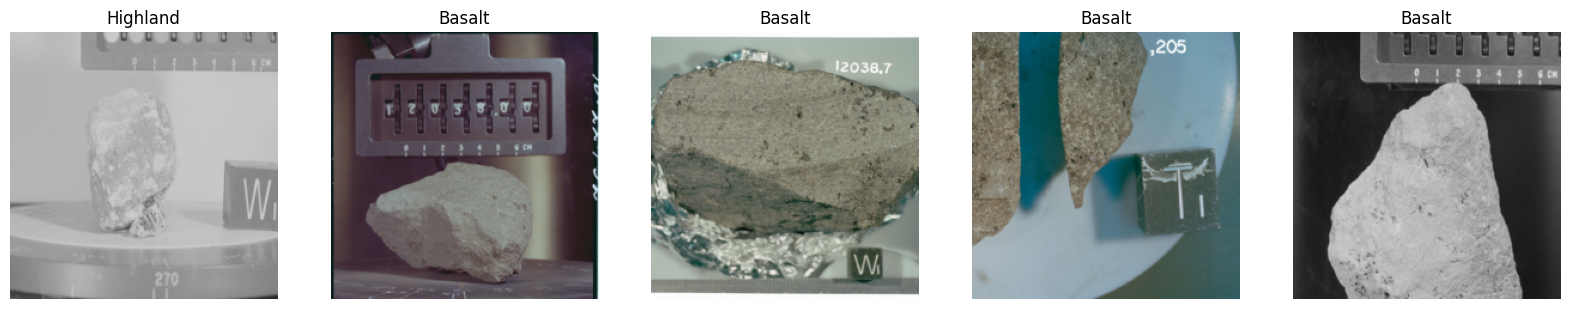

In [38]:
fig = plt.figure(figsize=(20,20))

classes = trainloader.dataset.classes

for i in range(len(images)):
    image = to_pil(images[i])
    sub = fig.add_subplot(1, len(images), i+1)
    index = labels[i].item()
    sub.set_title(classes[index])
    plt.axis('off')
    plt.imshow(image)

plt.show()

In [17]:
# device 정하기
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu' )
print(device)

cpu


In [ ]:
#모델 정하기 pretrained true 사전학습
model = models.resnet50(pretrained=True)

/workspaces/spacerocks/.venv/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/workspaces/spacerocks/.venv/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/codespace/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [42]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# 전이 학습 모델 가중치 freeze

for param in model.parameters():
    param.requires_grad = False

#신경망 생성 전이학습 fcl 수정
model.fc = nn.Sequential(nn.Linear(2048,512),
                         nn.ReLU(),
                         nn.Dropout(0.2),
                         nn.Linear(512, 2),
                         nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
#adam 옵티마이저사용
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [44]:
print(model.fc)

Sequential(
  (0): Linear(in_features=2048, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=512, out_features=2, bias=True)
  (4): LogSoftmax(dim=1)
)


In [18]:
epochs =10
print_every =5
running_loss = 0
train_losses, test_losses = [], []
steps = 0

In [51]:
for epoch in range(epochs):
    epoch += 1
    for inputs, labels in trainloader:
        steps += 1
        print('Training step',steps)
        inputs,labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        logps = model.forward(inputs)
        loss = criterion(logps,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():

                for inputs,labels in testloader:

                    inputs,labels = inputs.to(device),labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    test_loss += batch_loss.item()
                    ps=torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            train_losses.append(running_loss/len(trainloader))
            test_losses.append(test_loss/len(testloader))

            print("epoch {}/{}: ".format(epoch,epochs),
                  "Train loss: {:.3f}..".format(running_loss/print_every),
                  "test loss: {:.3f}..".format(test_loss/len(testloader)),
                  "test accuracy: {:.3f}\n".format(accuracy/len(testloader)))
            
            running_loss = 0
            model.train()

            break

            

Training step 61
Training step 62
Training step 63
Training step 64
Training step 65
epoch 1/10:  Train loss: 0.230.. test loss: 0.058.. test accuracy: 1.000

Training step 66
Training step 67
Training step 68
Training step 69
Training step 70
epoch 2/10:  Train loss: 0.246.. test loss: 0.197.. test accuracy: 0.935

Training step 71
Training step 72
Training step 73
Training step 74
Training step 75
epoch 3/10:  Train loss: 0.315.. test loss: 0.057.. test accuracy: 0.969

Training step 76
Training step 77
Training step 78
Training step 79
Training step 80
epoch 4/10:  Train loss: 0.154.. test loss: 0.146.. test accuracy: 0.935

Training step 81
Training step 82
Training step 83
Training step 84
Training step 85
epoch 5/10:  Train loss: 0.136.. test loss: 0.091.. test accuracy: 0.967

Training step 86
Training step 87
Training step 88
Training step 89
Training step 90
epoch 6/10:  Train loss: 0.267.. test loss: 0.046.. test accuracy: 1.000

Training step 91
Training step 92
Training ste

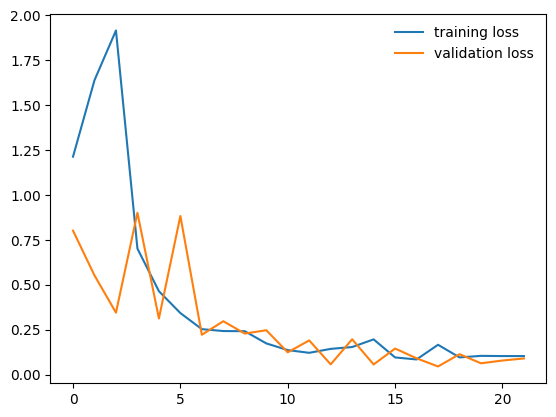

In [52]:
plt.plot(train_losses,label='training loss')
plt.plot(test_losses, label='validation loss')
plt.legend(frameon=False)

In [53]:
torch.save(model,'moonrockmodel.pth')

In [19]:
model=torch.load('moonrockmodel.pth')

In [20]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
def predict_image(image):
    image_tensor = t_transforms(image).float()
    input = image_tensor.unsqueeze_(0)
    input = input.to(device)
    output = model(input)
    index = output.data.numpy().argmax()

    return index

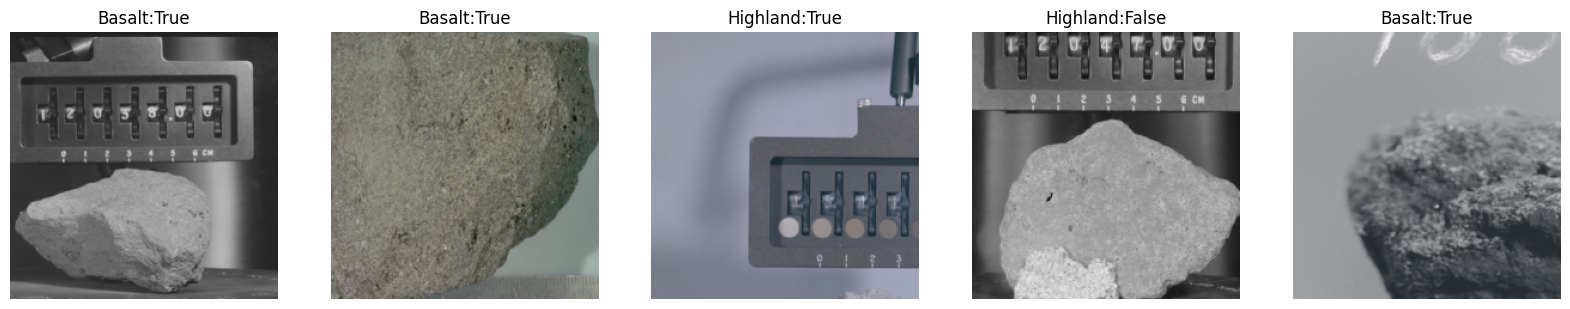

In [22]:
# 모델 평가 모드로 전환한다.
model.eval()
# 5개의 이미지를 랜덤하게 가져온 후 PIL 형식 변환, 표시할 이미지 크기를 설정한다.
to_pil = transforms.ToPILImage()
images, labels = get_random_images(5)
fig = plt.figure(figsize=(20, 20))
# 데이터의 class 목록을 얻는다.
classes = trainloader.dataset.classes

# 5개의 이미지에 대해 loop를 수행한다.
for ii in range(len(images)):
    # 각 이미지에 대해 class를 예측한다.
    image = to_pil(images[ii])
    index = predict_image(image)
    # 이미지 아래에 class를 표시하도록 설정한다.
    sub = fig.add_subplot(1, len(images), ii+1)
    res = labels[ii].item() == index
    sub.set_title(classes[index] + ':' + str(res))
    plt.axis('off')
    plt.imshow(image)
# 레이블이 추가된 이미지를 보여준다.
plt.show()

In [23]:
import random # 난수 생성 라이브러리

# 시드 설정 함수
def set_seed(seed):
  torch.manual_seed(seed) # PyTorch CPU 연산을 위한 시드 설정
  if torch.cuda.is_available(): # PyTorch GPU 연산을 위한 시드 설정
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) # 모든 GPU에 시드 설정
  np.random.seed(seed) # NumPy 연산을 위한 시드 설정
  random.seed(seed) # Python 내장 random 모듈을 위한 시드 설정

  # CuDNN 결정론적 동작 설정 (GPU 사용 시 추가적으로 재현성을 높임)
  # CuDNN 백엔드가 결정론적으로 동작하도록 설정합니다. 이는 일부 연산에서 속도 최적화를 위해
  # 비결정론적인 알고리즘을 사용할 수 있는데, 이를 방지하여 항상 동일한 결과를 얻도록 합니다.
  # 단, 이 설정은 성능에 영향을 줄 수 있습니다.
  torch.backends.cudnn.daterministic = True 
  torch.backends.cudnn.benchmark = False

# 시드 설정
set_seed(42) # 원하는 시드 값 설정